In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [6]:
drop_columns = data.columns[(data.isna().sum()/ data.shape[0]) > 0.1]
drop_columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
data.drop(drop_columns, axis=1, inplace=True)

In [8]:
columns = data.columns[data.dtypes != 'object']
columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
new_data = data.loc[:, columns]
new_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
new_data.isna().sum().sort_values(ascending=False).head(5)

GarageYrBlt     81
MasVnrArea       8
Id               0
OpenPorchSF      0
KitchenAbvGr     0
dtype: int64

In [11]:
new_data = new_data.fillna(-1)

### Criando o modelo

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = new_data.drop('SalePrice', axis=1)
y = new_data['SalePrice']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression().fit(X_train, y_train)
lr_predict = ln_reg.predict(X_test)

In [16]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)
dtr_predict = dt_reg.predict(X_test)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
knr_predict = knn_reg.predict(X_test)

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=1).fit(X_train, y_train)
gbr_predict = gb_reg.predict(X_test)

In [19]:
from sklearn.linear_model import Ridge
r_reg = Ridge(alpha=31.98).fit(X_train, y_train)
ridge_predict = r_reg.predict(X_test)

In [20]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(random_state=1).fit(X_train, y_train)
xgr_predict = xg_reg.predict(X_test)

### Avaliando o modelo

In [21]:
from sklearn.metrics import	mean_absolute_error, mean_squared_error

In [22]:
print('Linear Regression')
print(mean_absolute_error(y_test,lr_predict))
print(mean_squared_error(y_test,lr_predict))

Linear Regression
21989.162712512516
1165506663.9557672


In [23]:
print('Decision Tree Regression')
print(mean_absolute_error(y_test,dtr_predict))
print(mean_squared_error(y_test,dtr_predict))

Decision Tree Regression
26261.812785388127
1433380634.0182648


In [24]:
print('Knn Regression')
print(mean_absolute_error(y_test,knr_predict))
print(mean_squared_error(y_test,knr_predict))

Knn Regression
32727.37062404871
2828846994.3072047


In [25]:
print('Gradient Boosting Regression')
print(mean_absolute_error(y_test,gbr_predict))
print(mean_squared_error(y_test,gbr_predict))

Gradient Boosting Regression
16338.202280359359
578279163.4273506


In [26]:
print('Ridge Regression')
print(mean_absolute_error(y_test,ridge_predict))
print(mean_squared_error(y_test,ridge_predict))

Ridge Regression
21657.506907567415
1160118553.3757143


In [27]:
print('XGBoost Regression')
print(mean_absolute_error(y_test,xgr_predict))
print(mean_squared_error(y_test,xgr_predict))

XGBoost Regression
18043.614948986873
735019305.7602861


In [28]:
import matplotlib.pyplot as plt

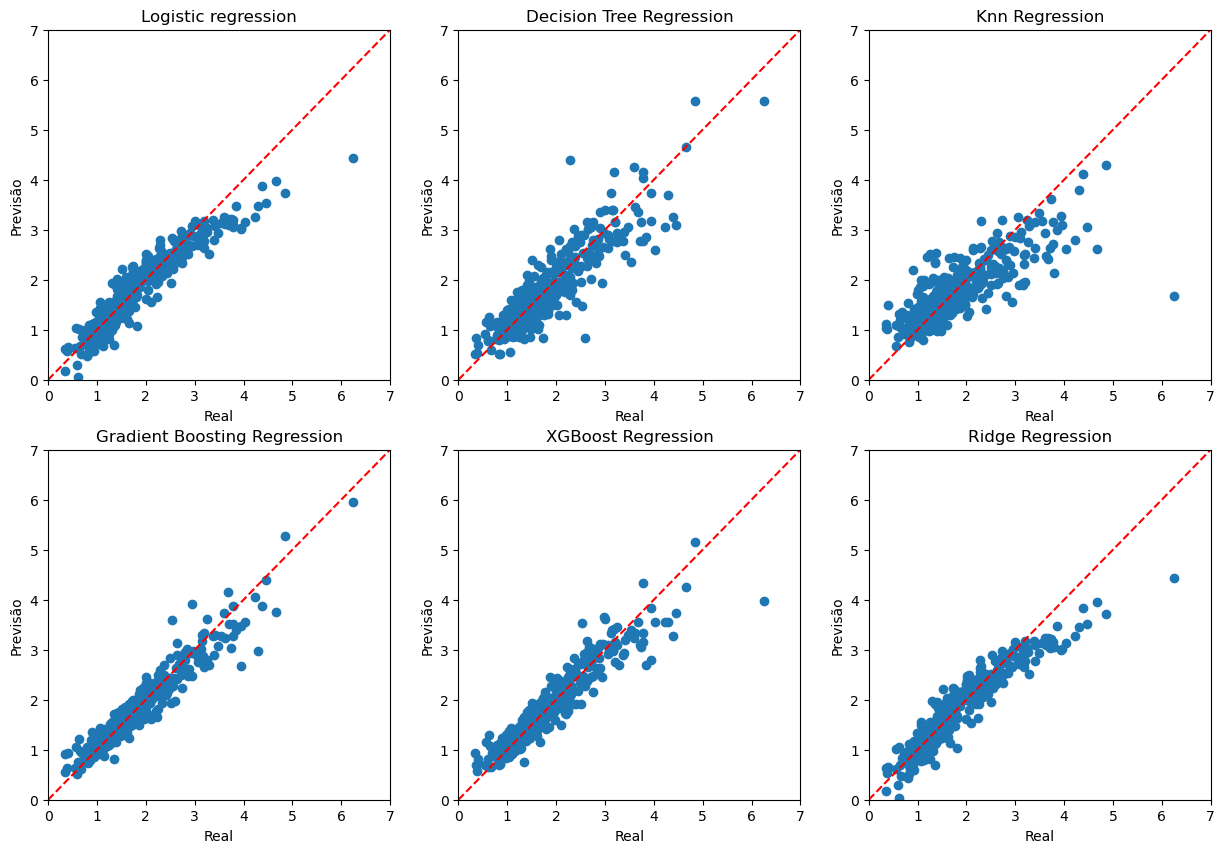

In [29]:
fig, ax = plt.subplots(2,3, figsize=(15, 10))

ax[0,0].scatter(y_test/100000, lr_predict/100000)
ax[0,0].plot([0,700000],[0,700000],'--r')
ax[0,1].scatter(y_test/100000,dtr_predict/100000)
ax[0,1].plot([0,700000],[0,700000],'--r')
ax[0,2].scatter(y_test/100000, knr_predict/100000)
ax[0,2].plot([0,700000],[0,700000],'--r')
ax[1,0].scatter(y_test/100000, gbr_predict/100000)
ax[1,0].plot([0,700000],[0,700000],'--r')
ax[1,1].scatter(y_test/100000, xgr_predict/100000)
ax[1,1].plot([0,700000],[0,700000],'--r')
ax[1,2].scatter(y_test/100000, ridge_predict/100000)
ax[1,2].plot([0,700000],[0,700000],'--r')

ax[0,0].set(xlim=(0,7), ylim=(0,7))
ax[0,0].set_title('Logistic regression')
ax[0,0].set_xlabel('Real')
ax[0,0].set_ylabel('Previsão')
ax[0,1].set(xlim=(0,7), ylim=(0,7))
ax[0,1].set_title('Decision Tree Regression')
ax[0,1].set_xlabel('Real')
ax[0,1].set_ylabel('Previsão')
ax[0,2].set(xlim=(0,7), ylim=(0,7))
ax[0,2].set_title('Knn Regression')
ax[0,2].set_xlabel('Real')
ax[0,2].set_ylabel('Previsão')
ax[1,0].set(xlim=(0,7), ylim=(0,7))
ax[1,0].set_title('Gradient Boosting Regression')
ax[1,0].set_xlabel('Real')
ax[1,0].set_ylabel('Previsão')
ax[1,1].set(xlim=(0,7), ylim=(0,7))
ax[1,1].set_title('XGBoost Regression')
ax[1,1].set_xlabel('Real')
ax[1,1].set_ylabel('Previsão')
ax[1,2].set(xlim=(0,7), ylim=(0,7))
ax[1,2].set_title('Ridge Regression')
ax[1,2].set_xlabel('Real')
ax[1,2].set_ylabel('Previsão')

plt.show()

### Base teste

In [30]:
test = pd.read_csv('test.csv')
test.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [31]:
test.drop(drop_columns, axis=1,inplace=True)

In [32]:
columns2 = test.columns[test.dtypes != object]
columns2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [33]:
test = test.loc[:, columns2]
test.head(8)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
5,1466,60,10000,6,5,1993,1994,0.0,0.0,0.0,...,440.0,157,84,0,0,0,0,0,4,2010
6,1467,20,7980,6,7,1992,2007,0.0,935.0,0.0,...,420.0,483,21,0,0,0,0,500,3,2010
7,1468,60,8402,6,5,1998,1998,0.0,0.0,0.0,...,393.0,0,75,0,0,0,0,0,5,2010


In [34]:
test.isna().sum().sort_values(ascending=False).head(11)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
OpenPorchSF      0
dtype: int64

In [35]:
test.fillna(-1,inplace=True)

In [36]:
y_predict = gb_reg.predict(test)

In [37]:
test['SalePrice'] = y_predict

In [38]:
results = test[['Id', 'SalePrice']]
results.head(3)

,Id,SalePrice
0,1461,123718.141657
1,1462,150311.188988
2,1463,191242.073432


In [39]:
results.to_csv('results.csv', index=False)